In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from collections import Counter

# The IMF

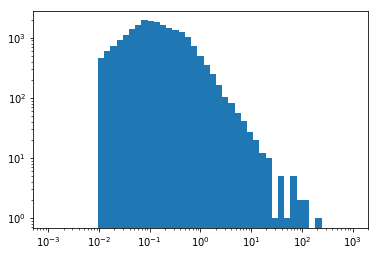

In [2]:
#Kroupa_2001 IMF. cluster mass of 10**4 M_sol
mass_array = np.loadtxt("masses.txt", delimiter = " " )

xvals1 = np.arange(0.01,0.08,0.001)
yvals1 = xvals1**0.7
xvals2 = np.arange(0.08,0.5, 0.01)
yvals2 = xvals2**-0.3
xvals3 = np.arange(0.5,100,1)
yvals3 = xvals3**-1.3

#Trial-and-error fitting of the IMF
#plt.plot(xvals1, 10**4 * yvals1,linewidth=2.0)
#plt.plot(xvals2, 10**3 * yvals2,linewidth=2.0)
#plt.plot(xvals3, 10**2.7 * yvals3,linewidth=2.0)
plt.hist(mass_array, bins = np.logspace(-3,3,50))
plt.xscale('log')
plt.yscale('log')
plt.show()

FIXME: FIGURE OUT THE NORMALIZATIONNNN

# The IFMF

### Black Hole IFMF

We attempt to reproduce the top half of Figure 1 and Figure 4 of Raithel et al. using equations (1) through (4), which gives fits for the IFMF for black holes. Note we've done a little bit of renaming here.There are two branches, Branches I and II, which are respectively

\begin{align*}
    M_{BH, I}(M_{ZAMS}; f_{ej}) &= f_{ej}M_{BH, core}(M_{ZAMS}) + (1-f_{ej})M_{BH, all}(M_{ZAMS}), \, 15 \leq M_{ZAMS} < 40M_\odot \\
    M_{BH, II}(M_{ZAMS}) &= 5.796 + 1.05 \times 10^9 (M_{ZAMS})^{-4.94}, \, 45 \leq M_{ZAMS} \leq 120M_\odot \\
\end{align*}

where $f_{ej}$ is the ejection fraction, and

\begin{align*}
    M_{BH, core}(M_{ZAMS}) &= -1.98 + 0.411M_{ZAMS} \\
    M_{BH, all}(M_{ZAMS}) &= 16.1 - 0.194(M_{ZAMS} - 23.9) - 0.041(M_{ZAMS} - 23.9)^2 + 0.00307(M_{ZAMS} - 23.9)^3.
\end{align*}

We pick $f_{ej} = 0.9$, as the paper suggests this is the best value. We also fill in the gap between 40 and 45 solar masses by just extending the domain of Branches I and II. Thus, the IFMF for black holes is 

\begin{align}
    IMFM_{BH}(M_{ZAMS}) &= 0.9 (-1.98 + 0.411M_{ZAMS}) + 0.1 [16.1 - 0.194(M_{ZAMS} - 23.9) - 0.041(M_{ZAMS} - 23.9)^2 + 0.00307(M_{ZAMS} - 23.9)^3], \, 15 < M_{ZAMS} < 42.22 \\
    &= 5.796 + 1.05 \times 10^9 M_{ZAMS}^{-4.94}, \, 42.22 < M_{ZAMS} < 120 
\end{align}

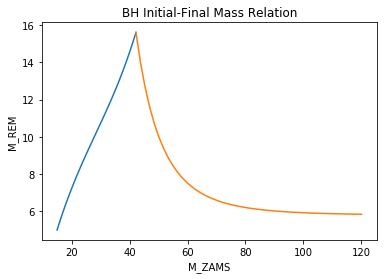

In [3]:
#Equation (1)
def BHMassCore(MZAMS):
    return -1.98 + 0.411*MZAMS

#Equation (2)
def BHMassAll(MZAMS):
    return 16.1 - 0.194 * (MZAMS - 23.9) - 0.041 * (MZAMS - 23.9)**2 + 0.00307 * (MZAMS - 23.9)**3

#Equation (3)
def BHMassCoreHigh(MZAMS):
    return 5.796 + 1.05 * 10**9 * MZAMS**-4.94

#Equation (4)
def BHMassExtrapolate(MZAMS, f_ej):
    return f_ej * BHMassCore(MZAMS) + (1 - f_ej) * BHMassAll(MZAMS)

#Branch I, this is defined different from the paper
BHmassRange1 = np.linspace(15,42.22)

#Branch II, this is defined different from the paper
BHmassRange2 = np.linspace(42.22,120)

#Plots f_ej = 0.9
plt.title("BH Initial-Final Mass Relation")
plt.xlabel("M_ZAMS")
plt.ylabel("M_REM")
plt.plot(BHmassRange1,BHMassExtrapolate(BHmassRange1,0.9))
plt.plot(BHmassRange2,BHMassCoreHigh(BHmassRange2))
plt.show()

### Neutron Star IFMF

Raithel et al. gives seven different branches for neutron star formation, with quite complex fits for each of them, in equations (10) to (15). However, all the neutron stars produced are around 1.6 $\pm$ 0.5 solar masses. For our purposes, we can approximate the final mass function to be flat. So, we'll approximate the neutron star IFMF as

\begin{equation}
    IFMF_{NS}(M_{ZAMS}) = 1.6, 9 < M_{ZAMS} < 120.
\end{equation}

### White Dwarf IFMF

A quick perusal of the literature seems to show general consensus on a linear IFMF (which they call the Initial-Final Mass Relation, or IFMR). While the exact fits vary, we can just take one and run with it. From http://online.kitp.ucsb.edu/online/snovae-c07/williams/pdf/Williams_SnovaeConf_KITP.pdf we have

\begin{equation*}
    IFMF_{WD}(M_{ZAMS}) = 0.358 + 0.123M_{ZAMS}
\end{equation*}

FIXME: What ranges is this equation valid for? Certainly not less than 0.358 solar masses- you'll get something from nothing!

### Getting the remnant mass

In [4]:
#Given the ZAMS mass, gives the remnant mass and type of compact object
#Slightly different version of getRemnantMass
#Assumptions: all neutron stars are the same mass
#Assumptions: WD progenitor masses go from 1 to 9 solar masses
def getRemMass(MZAMS,f_ej):
    """
    type BH = Black Hole
    type NS = Neutron Star
    type WD = White Dwarf
    type small = out of lower range
    type big = out of upper range
    """
    n = random.randint(1,101)
    if (MZAMS >= 0.5) and (MZAMS < 9):
        typecode = 'WD'
        return 0.358 + 0.123 * MZAMS,typecode
    if (MZAMS >= 9) and (MZAMS <= 15):
        typeCode = 'NS'
        return 1.6,typeCode
    elif (MZAMS > 15) and (MZAMS <= 17.8):
        if n > 68:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 17.8) and (MZAMS <= 18.5):
        if n > 83:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 18.5) and (MZAMS <= 21.7):
        if n > 50:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 21.7) and (MZAMS <= 25.2):
        typeCode = 'BH'
        return BHMassExtrapolate(MZAMS,f_ej),typeCode
    elif (MZAMS > 25.2) and (MZAMS <= 27.5):
        if n > 65:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 27.5) and (MZAMS <= 60):
        typeCode = 'BH'
        if MZAMS > 42:
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            return BHMassCoreHigh(MZAMS),typeCode
    elif (MZAMS > 60) and (MZAMS <= 120):
        if n > 40:
            typeCode = 'BH'
            return BHMassCoreHigh(MZAMS),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif MZAMS < 0.5:
        typeCode = 'small'
        return 0, typeCode
    else:
        typeCode = 'big'
        return 0, typeCode 

This is a quick demo of using getRemMass, assuming a flat input distribution of ZAMS masses.

Counter({'BH': 624, 'NS': 284, 'WD': 80, 'small': 12})


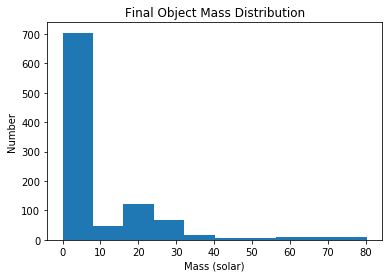

In [9]:
typeArray = massArray = []

#number of progenitor stars
N = 1000

for i in range(N):
    randomZAMS = random.randint(0,120)
    remnantMass, typeCode = getRemMass(randomZAMS,0.9)
    typeArray = np.append(typeArray, typeCode)
    massArray = np.append(massArray, remnantMass)

#count how many WD, NS, and BH there are    
print(Counter(typeArray))

#plot the mass distribution
plt.hist(massArray)
plt.xlabel("Mass (solar)")
plt.ylabel("Number")
plt.title("Final Object Mass Distribution")
plt.show()

To get a realistic distribution, you would draw from the IMF to get the relative weightings correct.  

Counter({'small': 18069, 'WD': 3269, 'NS': 50, 'BH': 26, 'big': 3})


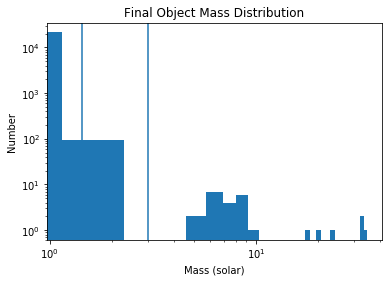

In [8]:
typeArray = massArray = []

#number of progenitor stars
N = len(mass_array)

for i in range(N):
    remnantMass, typeCode = getRemMass(mass_array[i],0.9)
    massArray = np.append(massArray, remnantMass)
    typeArray = np.append(typeArray, typeCode)
    
#counts the different types    
print(Counter(typeArray))    

BHarray = [i for i in massArray if i > 3]    
NSarray = [i for i in massArray if i <= 3 and i > 1.44]
WDarray = [i for i in massArray if i > 0 and i <= 1.44]
NAarray = [i for i in massArray if i == 0]

#plot the mass distribution
plt.hist(massArray, bins = 10*3)
plt.axvline(x=3)
plt.axvline(x=1.44)
plt.xlabel("Mass (solar)")
plt.ylabel("Number")
plt.title("Final Object Mass Distribution")
plt.xscale('log')
plt.yscale('log')
plt.show()

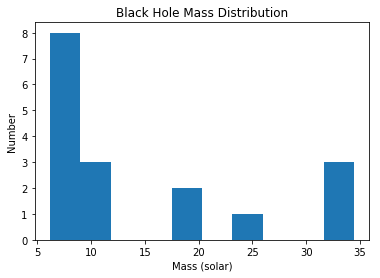

In [7]:
plt.hist(BHarray)
plt.xlabel("Mass (solar)")
plt.ylabel("Number")
plt.title("Black Hole Mass Distribution")
plt.show()

# Number of BHs in the Milky Way

A guesstimate: our galaxy cluster was $10^4 M_\odot$. According to the internet, the Milky Way is about $10^{12} M_\odot$. From the $10^4 M_\odot$ cluster, we get about 20ish black holes. Extrapolating that number, we expect the Milky Way to have about a billion black holes. The internet claims in the Milky Way has about 100 million black holes. 